# 7. Plots
## 7.2 TOI 519.01 in context

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from warnings import warn

In [3]:
from matplotlib.colors import LogNorm, SymLogNorm, PowerNorm, BoundaryNorm, DivergingNorm

In [4]:
%run ../src/core.py
%run ../src/plotting.py

In [5]:
%run toi_519.py

In [40]:
df = derive_qois(read_mcmc('toi_519.01_tess_and_gb.nc'), star_r, star_teff)
ctl = pd.read_csv('exoplanet.eu_catalog.csv').dropna(subset=['radius', 'orbital_period'])

In [7]:
mdb = pd.read_csv('m_dwarf_binaries.csv', index_col=0)

In [8]:
try:
    raise ImportError('Blah')
except ImportError as e:
    warn('')

In [44]:
df_bds = pd.concat([ctl[ctl.iloc[:,0] == 'AD 3116 b'], ctl[ctl.iloc[:,0] == 'NLTT 41135 b'], ctl[ctl.iloc[:,0] == 'TOI-263 b']])
df_bds

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
71,AD 3116 b,Confirmed,54.2,4.3,4.3,NaN,NaN,NaN,1.02,0.28,...,M3.9,NaN,NaN,NaN,3200.0,200.0,200.0,NaN,NaN,"EPIC 211946007, 2MASS J08423943+1924520"
3746,NLTT 41135 b,Confirmed,33.7,2.8,2.8,33.7,2.8,2.8,1.13,0.17,...,M5.1,NaN,NaN,NaN,3230.0,130.0,130.0,NaN,NaN,NaN
3910,TOI-263 b,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,0.83,0.17,...,M3.5V,4.75,4.35,4.35,3250.0,140.0,140.0,NaN,NaN,"TIC120916706, TOI 263"


In [45]:
ctl.drop(df_bds.index.values, inplace=True)

## Brown dwarf periods and radii

Brown dwarf periods and radii taken from Carmichael et al. (C19, Astron. J. 158, 2019), Persson et al. (P19, A&A 628, 2019), Jackman et al. (J19, ArXiv:1906.08219), and David et al. (D19, ApJ 872, 2019).

In [12]:
bdh_periods = array([12.713,  1.218,   1.888, 3.192,  4.157, 2.209, 4.257, 3.060, 5.819, 21.087, # C19
                     30.360, 11.720, 166.788, 5.894, 40.737, 5.170, 5.293, 9.779, 9.779,         # C19
                     5.27])                                                                      # P19

bdh_radii = array([0.833, 1.116, 1.384, 1.217, 0.889, 0.937, 1.01, 1.12, 1.10, 1.24, 0.998,      # C19
                   0.807, 0.79, 1.089, 0.757, 0.874, 0.941, 6.5, 5.0,                            # C19
                   0.83])                                                                        # P19

In [13]:
bdc_names = ['TOI 263.01', 'NGTS-7Ab', 'LP 261-75b', 'NLTT 41135 b', 'AD 3116 b', 'RIK 72 b']
bdc_periods = [0.56,                    # P20
               16.2 / 24,               # J19
               1.882, 2.889, 1.983,     # C19
               97.76]                   # D19
bdc_radii = [0.87,
             1.38,                      # J19
             0.898, 1.13, 1.02,         # C19
             3.10]                      # D19

bdc_teff = [3250,
           3359,
           3100, 3230, 3200,
           3349]

bdc_smass = [0.4,
            0.48,
            0.3, 0.188, 0.276,
            0.439]

sid = argsort(bdc_periods)
bdc_names = array(bdc_names)[sid]
bdc_periods = array(bdc_periods)[sid]
bdc_radii = array(bdc_radii)[sid]

In [14]:
from pytransit.orbits import as_from_rhop, d_from_pkaiews

In [15]:
as_from_rhop(7, 30)

69.3161144646869

In [16]:
24*d_from_pkaiews(30, 0.1, 70, 0.5*pi, 0.9, 0.5*pi, 1)

0.8262630733104118

In [63]:
mcool = (ctl.star_teff >= 1000) & (ctl.star_teff <= 4000)
mcool &= ctl.iloc[:,0] != 'NGTS-7A b'
mcool &= ctl.iloc[:,0] != 'GJ 674 b'
sp_clump = ctl[mcool & (ctl['radius'] > 0.75) & (ctl['orbital_period'] < 10)]['# name, orbital_period, radius, mass, star_teff, star_mass'.split(', ')]
sp_clump.columns = 'name period radius mass teff star_mass'.split()
sp_clump = sp_clump.reset_index().drop('index', 1)
sp_clump.sort_values('period', inplace=True)
sp_clump = sp_clump.reset_index().drop('index', 1)
#sp_clump = sp_clump.drop(0).reset_index()

In [64]:
sp_clump.name

0    Kepler-45 b
1       NGTS-1 b
2       HATS-6 b
3     HATS-71A b
Name: name, dtype: object

# TODO: Check HATS-71A b 

In [28]:
for c,d in sp_clump.iterrows():
    print(c+1, d.iloc[0], d.period)
    
print(bdc_names[1:])

1 1 2.4552389999999997
2 2 2.647298
3 3 3.3252725
4 4 3.7955212999999994
['NGTS-7Ab' 'LP 261-75b' 'AD 3116 b' 'NLTT 41135 b' 'RIK 72 b']


In [68]:
bdc_names

array(['TOI 263.01', 'NGTS-7Ab', 'LP 261-75b', 'AD 3116 b',
       'NLTT 41135 b', 'RIK 72 b'], dtype='<U12')

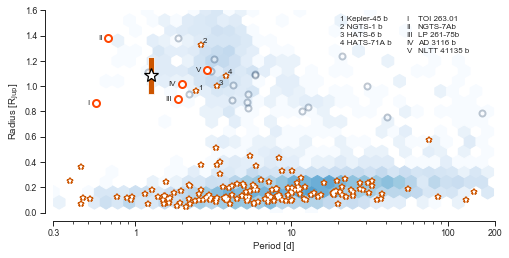

In [100]:
pes = percentile(df.r_true, [50, 16, 84, 0.5, 99.5])


sb.set_style('ticks')
with sb.plotting_context('paper'): #, rc=rc_paper):
    fig, ax = subplots(figsize=(AAPGW, AAOCW))#, constrained_layout=True)
    
    # Planets orbiting "hot" hosts stars
    # ----------------------------------
    hexbin(ctl.orbital_period[~mcool], ctl.radius[~mcool], gridsize=(37,10), xscale='log', 
           extent=(log10(0.3), log10(180), 0, 1.6), mincnt=1, cmap=cm.Blues, norm=PowerNorm(0.5, 1, 200))
    
    # Planets orbiting cool hosts stars
    # ---------------------------------
    ax.semilogx(ctl.orbital_period[mcool], ctl.radius[mcool], 'w*', markeredgewidth=2, markeredgecolor=c_bo, ms=6)
    ax.semilogx(ctl.orbital_period[mcool], ctl.radius[mcool], 'w*', markeredgewidth=0, ms=5)
    
    # Brown dwarfs orbiting "hot" host stars
    # --------------------------------------
    ax.semilogx(bdh_periods, bdh_radii, 'wo', markeredgecolor=c_ob, ms=6, markeredgewidth=2, alpha=0.25)
    ax.semilogx(bdh_periods, bdh_radii, 'wo', markeredgecolor='w', ms=4, markeredgewidth=0, alpha=0.25)
        
    # Brown dwarfs orbiting cool host stars
    # -------------------------------------
    ax.semilogx(bdc_periods, bdc_radii, 'wo', ms=7, markeredgecolor='orangered', markeredgewidth=2)
    
    for i,d in sp_clump.iterrows():
        ax.annotate(i+1, (d.period, d.radius), (2., 2.), textcoords='offset points', size='small')
        ax.text(0.65, 0.95-i*0.04, f"{i+1} {d['name']}", ha='left', transform=ax.transAxes, size='smaller')

    
    for ii,(i,p,k,n) in enumerate(zip('I II III IV V'.split(), bdc_periods, bdc_radii, bdc_names)):
        ax.annotate(i, (p, k), (-6, 0), textcoords='offset points', size='small', ha='right', va='center', zorder=100)
        ax.text(0.8, 0.95-ii*0.04, f"{i}", ha='left', transform=ax.transAxes, size='smaller')
        ax.text(0.825, 0.95-ii*0.04, f"{n}", ha='left', transform=ax.transAxes, size='smaller')

    # TOI 519
    # -------
    ax.plot(df.p.mean(), pes[0], 'w*', ms=14, markeredgecolor='k', markeredgewidth=1.25)
    ax.bar(df.p.mean(), pes[2]-pes[1], 0.1, pes[1], alpha=1.0, fc=c_bo)

    setp(ax, ylim=(0,1.6), xlim=(0.3, 200), ylabel='Radius [R$_\mathrm{Jup}$]', xlabel='Period [d]',
        xticks=(0.3, 1, 10, 100, 200), xticklabels=(0.3, 1, 10, 100, 200))
    sb.despine(fig, offset=8)
    fig.tight_layout()
    fig.subplots_adjust(left=0.1, top=0.97, bottom=0.16)
    fig.savefig('plots/toi_519_in_context_period.pdf')

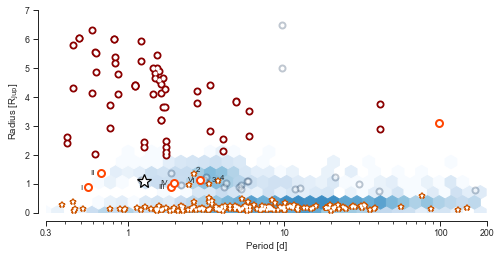

In [66]:
pes = percentile(df.r_true, [50, 16, 84, 0.5, 99.5])


sb.set_style('ticks')
with sb.plotting_context('paper'): #, rc=rc_paper):
    fig, ax = subplots(figsize=(AAPGW, AAOCW))#, constrained_layout=True)
    
    # Planets orbiting "hot" hosts stars
    # ----------------------------------
    hexbin(ctl.orbital_period[~mcool], ctl.radius[~mcool], gridsize=(37,10), xscale='log', 
           extent=(log10(0.3), log10(180), 0, 7), mincnt=1, cmap=cm.Blues, norm=PowerNorm(0.5, 1, 200))
    
    # Planets orbiting cool hosts stars
    # ---------------------------------
    ax.semilogx(ctl.orbital_period[mcool], ctl.radius[mcool], 'w*', markeredgewidth=2, markeredgecolor=c_bo, ms=6)
    ax.semilogx(ctl.orbital_period[mcool], ctl.radius[mcool], 'w*', markeredgewidth=0, ms=5)
    
    # Brown dwarfs orbiting "hot" host stars
    # --------------------------------------
    ax.semilogx(bdh_periods, bdh_radii, 'wo', markeredgecolor=c_ob, ms=6, markeredgewidth=2, alpha=0.25)
    ax.semilogx(bdh_periods, bdh_radii, 'wo', markeredgecolor='w', ms=4, markeredgewidth=0, alpha=0.25)
        
    # Brown dwarfs orbiting cool host stars
    # -------------------------------------
    ax.semilogx(bdc_periods, bdc_radii, 'wo', ms=7, markeredgecolor='orangered', markeredgewidth=2)
    
    # M dwarf binaries
    # ----------------
    ax.semilogx(mdb.period, mdb.radius, 'o', c='w', markeredgecolor='darkred', markeredgewidth=2, ms=6)
    ax.semilogx(mdb.period, mdb.radius, 'o', c='w', markeredgecolor='w', markeredgewidth=0, ms=4)

    
    for i,d in sp_clump.iterrows():
        ax.annotate(i+1, (d.period, d.radius), (2., 2.), textcoords='offset points', size='small')
    
    for i,p,k in zip('I II III IV V'.split(), bdc_periods, bdc_radii):
        if k < 1.5:
            ax.annotate(i, (p, k), (-6, 0), textcoords='offset points', size='small', ha='right', va='center', zorder=100)

    # TOI 519
    # -------
    ax.plot(df.p.mean(), pes[0], 'w*', ms=14, markeredgecolor='k', markeredgewidth=1.25)
    ax.bar(df.p.mean(), pes[2]-pes[1], 0.1, pes[1], alpha=1.0, fc=c_bo)

    setp(ax, ylim=(0, 7), xlim=(0.3, 200), ylabel='Radius [R$_\mathrm{Jup}$]', xlabel='Period [d]',
        xticks=(0.3, 1, 10, 100, 200), xticklabels=(0.3, 1, 10, 100, 200))
    sb.despine(fig, offset=8)
    fig.tight_layout()
    fig.subplots_adjust(left=0.1, top=0.97, bottom=0.16)
    fig.savefig('plots/toi_519_in_context_period_with_lm_binaries.pdf')

In [49]:
bdc_periods, 
bdc_teff = array(bdc_teff)

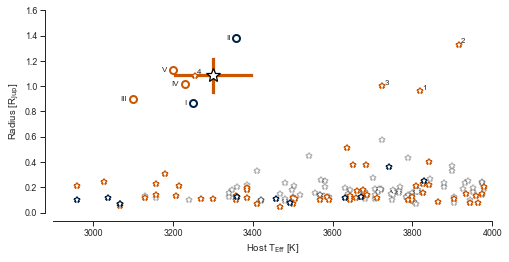

In [67]:
pes = percentile(df.r_true, [50, 16, 84, 0.5, 99.5])
mp = ctl.orbital_period.values < 5

sb.set_style('ticks')
with sb.plotting_context('paper'): #, rc=rc_paper):
    fig, ax = subplots(figsize=(AAPGW, AAOCW))#, constrained_layout=True)
    
    mcool &= ctl.radius < 1.4
    
    # Planets orbiting cool hosts stars
    # ---------------------------------
    mp = ctl.orbital_period >= 5
    c = ctl[mcool & mp]
    ax.plot(c.star_teff, c.radius, 'w*', markeredgewidth=2, markeredgecolor='k', ms=6, alpha=0.3)
    ax.plot(c.star_teff, c.radius, 'w*', markeredgewidth=0, ms=5)
    
    mp = (ctl.orbital_period > 1.0) & (ctl.orbital_period < 5)
    c = ctl[mcool & mp]
    ax.plot(c.star_teff, c.radius, 'w*', markeredgewidth=2, markeredgecolor=c_bo, ms=6)
    ax.plot(c.star_teff, c.radius, 'w*', markeredgewidth=0, ms=5)
    
    mp = ctl.orbital_period <= 1
    c = ctl[mcool & mp]
    ax.plot(c.star_teff, c.radius, 'w*', markeredgewidth=2, markeredgecolor=c_ob, ms=6)
    ax.plot(c.star_teff, c.radius, 'w*', markeredgewidth=0, ms=5)
    
        
    # Brown dwarfs orbiting cool host stars
    # -------------------------------------
    m = bdc_periods >= 5
    ax.plot(bdc_teff[m], bdc_radii[m], 'wo', ms=7, markeredgecolor='k', markeredgewidth=2, alpha=0.3)
    m = (bdc_periods > 1) & (bdc_periods < 5)
    ax.plot(bdc_teff[m], bdc_radii[m], 'wo', ms=7, markeredgecolor=c_bo, markeredgewidth=2)
    m = bdc_periods < 1
    ax.plot(bdc_teff[m], bdc_radii[m], 'wo', ms=7, markeredgecolor=c_ob, markeredgewidth=2)
    
    for i,d in sp_clump.iterrows():
        ax.annotate(i+1, (d.teff, d.radius), (2., 2.), textcoords='offset points', size='small')
    
    for i,p,k in zip('I II III IV V'.split(), bdc_teff, bdc_radii):
        if k < 1.5:
            ax.annotate(i, (p, k), (-6, 0), textcoords='offset points', size='small', ha='right', va='center', zorder=100)

    # TOI 519
    # -------
    ax.plot(star_teff.n, pes[0], 'w*', ms=14, markeredgecolor='k', markeredgewidth=1.25)
    ax.bar(star_teff.n, pes[2]-pes[1], 10, pes[1], alpha=1.0, fc=c_bo)
    ax.bar(star_teff.n, 0.03, 2*star_teff.s, pes[0]-0.015, alpha=1.0, fc=c_bo)

    
    setp(ax, xlim=(2900,4000), ylim=(0,1.6), ylabel='Radius [R$_\mathrm{Jup}$]', xlabel='Host T$_\mathrm{Eff}$ [K]')
    sb.despine(fig, offset=8)
    fig.tight_layout()
    fig.subplots_adjust(left=0.1, top=0.97, bottom=0.16)
    fig.savefig('plots/toi_519_in_context_teff.pdf')

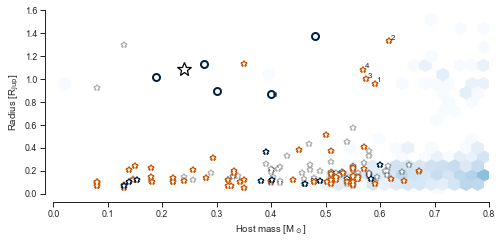

In [51]:
mcool = (ctl.star_teff >= 1000) & (ctl.star_teff <= 4000)
mper = ctl.orbital_period < 5
with sb.plotting_context('paper'): #, rc=rc_paper):
    fig, ax = subplots(figsize=(AAPGW, AAOCW))#, constrained_layout=True)
    ax.hexbin(ctl.star_mass[~mcool], ctl.radius[~mcool], gridsize=(37,10), xscale='linear', 
           extent=(0, 0.79, 0, 1.6), mincnt=1, cmap=cm.Blues, norm=PowerNorm(0.5, 1, 200))
    
    ax.plot(bdc_smass, bdc_radii, 'wo', ms=7, markeredgecolor=c_ob, markeredgewidth=2)

    mp = ctl.orbital_period >= 5
    c = ctl[mcool & mp]
    ax.plot(c.star_mass, c.radius, 'w*', markeredgewidth=2, markeredgecolor='k', ms=6, alpha=0.3)
    ax.plot(c.star_mass, c.radius, 'w*', markeredgewidth=0, ms=5)
    
    mp = (ctl.orbital_period > 1.0) & (ctl.orbital_period < 5)
    c = ctl[mcool & mp]
    ax.plot(c.star_mass, c.radius, 'w*', markeredgewidth=2, markeredgecolor=c_bo, ms=6)
    ax.plot(c.star_mass, c.radius, 'w*', markeredgewidth=0, ms=5)
    
    mp = ctl.orbital_period <= 1
    c = ctl[mcool & mp]
    ax.plot(c.star_mass, c.radius, 'w*', markeredgewidth=2, markeredgecolor=c_ob, ms=6)
    ax.plot(c.star_mass, c.radius, 'w*', markeredgewidth=0, ms=5)
    
    ax.plot(0.24, pes[0], 'w*', ms=14, markeredgecolor='k', markeredgewidth=1.25)
    for i,d in sp_clump.iterrows():
        ax.annotate(i, (d.star_mass, d.radius), (2., 2.), textcoords='offset points', size='small')
    setp(ax, xlim=(0,0.8), ylim=(0,1.6), ylabel='Radius [R$_\mathrm{Jup}$]', xlabel='Host mass [M$_\odot$]')

    sb.despine(fig, offset=8)
    fig.tight_layout()
    fig.subplots_adjust(left=0.1, top=0.97, bottom=0.16)
    fig.savefig('plots/toi_519_in_context_smass.pdf')
fig.tight_layout()

---


<center> © 2019 Hannu Parviainen </center>